<a href="https://colab.research.google.com/github/AnnCherk/LabsMOMO/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа 1: Алгоритмы разложения матриц. PCA.
_Команда 9_ <br>
_Куимов, Оплетаев, Подольская, Черкасская_

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

### 1. Метод главных компонент
##### Cингулярное матричные разложения

In [ ]:
def qr_decomposition(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for i in range(n):
        v = A[:, i]
        for j in range(i):
            R[j, i] = np.dot(Q[:, j], A[:, i])
            v -= R[j, i] * Q[:, j]
        R[i, i] = np.linalg.norm(v)
        Q[:, i] = v / R[i, i]

    return Q, R

def singular_value_decomposition(X, Q, R):
    X = X.astype('float64')

    m, n = X.shape
    U = np.zeros((m, n))
    S = np.zeros((n, n))
    VT = np.zeros((n, n))

    for i in range(n):
        U[:, i] = Q[:, i]

    for i in range(n):
        S[i, i] = R[i, i]

    VT = np.transpose(Q)

    return U, S, VT

Для реализации сингулярного разложения был использован QR-алгоритм, основанный на модифицированном алгоритме ортогонализации Грама-Шмидта, который по сравнению с классическим алгоритмом является более устойчивым к численным ошибкам округления компьютера.

##### Представление набора данных

In [ ]:
df = pd.read_csv("cars_.csv", delimiter=";", header=0)
df.columns = df.columns.str.lower()
df['manufacturer'] = df['car'].apply(lambda x: x.split(' ')[0])
df = pd.get_dummies(df, columns=['origin'], prefix='origin')
df.drop('origin_CAT', axis=1, inplace=True) # Ненужная колонка
df.drop('car', axis=1, inplace=True) # Ненужная колонка
df.drop(0, inplace=True) # Строка с названиями колонок

numeric_columns = [
    'mpg', 'displacement', 'cylinders',
    'horsepower', 'weight', 'acceleration',
    'model', 'origin_Europe', 'origin_Japan',
    'origin_US'
]

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce') # Перевод из строк в цифры
    df[column] = 2 * (df[column] - df[column].min()) / (df[column].max() - df[column].min()) # Масштабирование [0; 2]
    df[column] = df[column] - df[column].mean() # Центрирование ~[-1;1]
df_x = df.drop('manufacturer', axis=1).apply(pd.to_numeric, errors='ignore')
df_y = df['manufacturer']

X = df_x.values

print(df_x)
print(X)

          mpg  cylinders  displacement  horsepower    weight  acceleration  \
1   -0.216791   1.009852      0.579951    0.230178  0.297469     -0.419012   
2   -0.345546   1.009852      0.802173    0.534526  0.404642     -0.478536   
3   -0.216791   1.009852      0.636798    0.404091  0.258909     -0.538060   
4   -0.302628   1.009852      0.564447    0.404091  0.257208     -0.419012   
5   -0.259710   1.009852      0.554111    0.317134  0.266281     -0.597584   
..        ...        ...           ...         ...       ...           ...   
402  0.169475  -0.590148     -0.283098   -0.152431 -0.107408      0.009559   
403  0.899089  -0.590148     -0.505321   -0.448083 -0.481664      1.080988   
404  0.384067  -0.590148     -0.308938   -0.169822 -0.388100     -0.466631   
405  0.212393  -0.590148     -0.386458   -0.213300 -0.200972      0.366702   
406  0.341149  -0.590148     -0.391626   -0.187214 -0.147102      0.461940   

        model  origin_Europe  origin_Japan  origin_US  
1   -0.

##### Применение метода сингулярного разложения на данных

In [ ]:
Q, R = qr_decomposition(X)
U, S, VT = singular_value_decomposition(X, Q, R)

print("Матрица U:")
print(U)
print(U.shape)
print("\nМатрица S:")
print(S)
print(S.shape)
print("\nМатрица VT:")
print(VT)
print(VT.shape)

Матрица U:
[[-0.02987436  0.07571778 -0.0453509  ... -0.00757508 -0.01593729
   0.02862097]
 [-0.04761718  0.05645315  0.01594267 ...  0.00558013 -0.00686004
   0.00477016]
 [-0.02987436  0.07571778 -0.02749576 ... -0.00178612 -0.02495718
   0.01908064]
 ...
 [ 0.05292545 -0.00573952  0.05291746 ... -0.01566429 -0.07318033
  -0.09540322]
 [ 0.02926836 -0.03142569  0.01723116 ... -0.03062106 -0.06518197
  -0.05724193]
 [ 0.04701118 -0.01216106  0.02411176 ... -0.03554773 -0.07514977
  -0.01908064]]
(406, 10)

Матрица S:
[[7.25675998e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.33712769e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.18382003e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.

Выше приведены результаты сингулярного разложения матрицы данных *X* размера 406x10.

Как видно, матрица *S* - диагональная матрица, на её диагонали расположены неотрицательные числа *ωi* - сингулярные числа. Её размерность совпадает с количеством столбцов исследуемой матрицы.

Данное разложение было получено с помощью использования QR-алгоритма, основаного на методе ортогонализации Грама-Шмидта. QR-алгоритм позволяет приближенно вычислить собственные значения и собственные векторы матрицы.
Создана матрица левых сингулярных векторов, квадратная матрица сингулярных значений, матрица правых сингулярных векторов и применено QR-разложение.

##### Преимущества и недостатки применения сингулярного и спектрального разложения к задачам PCA

Основное различие сингулярного и спектрального разложения - ограничение их применения. Спектральное разложение может быть применено только к квадратным матрицам, в то время как сингулярное разложение является более универсальным и применимо в общем случае к прямоугольным матрицам.

В отличие от SVD, спектральное разложение не гарантирует ортогональность полученных матриц. Это может затруднить интерпретацию результатов и усложнить дальнейшую обработку данных.
Однако, SVD предоставляет полную информацию о матрице, включая левые и правые сингулярные векторы и сингулярные значения. Это позволяет получить полное представление о структуре данных и их вкладе в общую дисперсию.

##### Определение числа компонент, визуализация данных, анализ полученных компонент

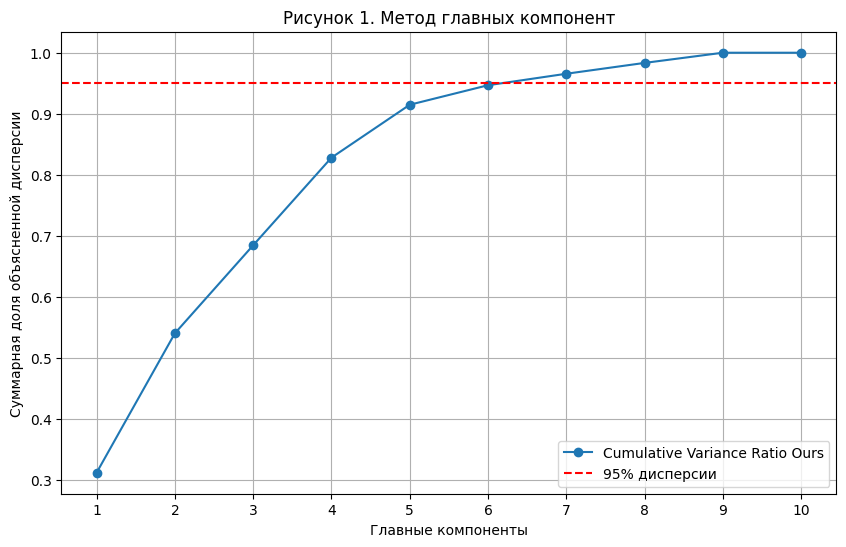

In [ ]:
# Матрица преобразования данных к главным компонентам (PCA)
PCA_matrix = U

# Значения объясняемых дисперсий (собственные значения)
explained_variances = (S ** 2) / (X.shape[0] - 1)

# Общая объясненная дисперсия
total_variance = np.sum(explained_variances)

# Доля объясненной дисперсии для каждой главной компоненты
explained_variance_ratio = explained_variances / total_variance

cumulative_variance_ratio = np.cumsum(np.sort(np.diag(explained_variance_ratio))[::-1])

component_numbers = range(1, len(explained_variance_ratio) + 1)

# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(component_numbers, cumulative_variance_ratio, marker='o', linestyle='-', label='Cumulative Variance Ratio Ours')

plt.axhline(y=0.95, color='r', linestyle='--', label='95% дисперсии')
plt.title('Рисунок 1. Метод главных компонент')
plt.xlabel('Главные компоненты')
plt.ylabel('Суммарная доля объясненной дисперсии')
plt.xticks(component_numbers)
plt.grid(True)
plt.legend()

plt.show()

Из рис. 1 видно, что размерность исходного массива данных можно снизить с 10 до 6, при этом 95% информации будет сохранено.

##### Дополнительное задание

В статье [4] из задания лабораторной работы приведена информация о методах приближенного сингулярного разложения, которые обладают меньшей вычислительной сложностью, чем классический метод SVD. Примером такого приближенного алгоритма может быть рандомизированное сингулярное разложение (функция randomized_svd).

In [ ]:
def randomized_svd(A, k):
    m, n = A.shape

    # Генерирация рандомизированной матрицу для снижения размерности
    O = np.random.randn(n, k)

    # Формируем преобразованную матрицу Y
    Y = A.dot(O)

    # Вычисляем QR-разложение матрицы Y
    Q, _ = qr_decomposition(Y)

    # Вычисляем преобразованную матрицу B
    B = np.transpose(Q).dot(A)

    # Вычисляем SVD для матрицы B
    U_hat, S, V = np.linalg.svd(B)

    # Вычисляем приближенные матрицы U и V
    U = Q.dot(U_hat)

    return U, S, np.transpose(V)

# Пример использования
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

U, S, VT = randomized_svd(X, 3)

print("U:")
print(U)
print("S:")
print(S)
print("VT:")
print(VT)


U:
[[ 0.00628023  0.06228423  0.0082631 ]
 [ 0.0112164   0.00998443  0.03764951]
 [ 0.00625689  0.05105232  0.02204034]
 ...
 [-0.00178514  0.04457223 -0.0919718 ]
 [-0.03669566  0.0148396   0.00681527]
 [-0.05346684  0.03884291  0.01181572]]
S:
[11.62690627 10.21246063  6.84060147]
VT:
[[ 1.27187022e-02  8.90358239e-02 -7.12280307e-01  1.18830208e-01
   1.65678281e-02  2.90133463e-01  2.29104798e-01 -4.58491182e-01
   3.51129480e-01  1.99651904e-16]
 [ 3.29995284e-01  4.76605196e-01  4.61996412e-01 -1.19975626e-02
  -6.35969257e-02 -7.04972475e-02 -2.22501780e-01 -5.53923060e-01
   2.91571166e-01 -1.30878628e-16]
 [-6.52824765e-03 -6.40496699e-02 -1.03779923e-01  8.45026628e-02
   1.14565625e-01  8.96557894e-02 -2.33310938e-01 -5.02543316e-01
  -8.06099763e-01 -6.33322160e-17]
 [-6.24165110e-02 -1.34707419e-02  1.31020557e-01  9.85883223e-01
  -1.03344634e-02 -2.55885512e-02  2.60888235e-03  6.49219050e-02
   4.25131436e-02 -8.30483600e-18]
 [-4.23697330e-02  8.83627879e-02  6.5257682

Суть Randomized SVD заключается в использовании случайных проекций для снижения размерности исходной матрицы перед применением стандартного SVD, поэтому вычислительная сложность уменьшается при разложении матриц больших размеров.



### 2. Kernel PCA

##### Представление набора данных

1. Набор данных, используемый в методе с радиальной базисной функцией

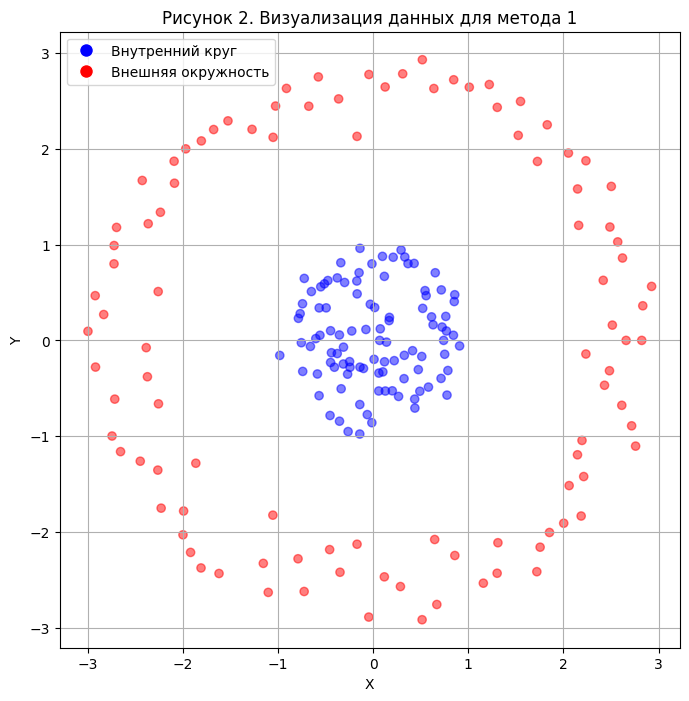

In [ ]:
# Определение параметров
np.random.seed(0)  # Установка начального значения
num_points = 100
small_circle_radius = 1
big_doughnut_outer_radius = 3
big_doughnut_inner_radius = 2

# Генерирование случайных точек внутреннего круга
theta_small = np.linspace(0, 2 * np.pi, num_points)
r_small = small_circle_radius * np.sqrt(np.random.rand(num_points))
x_small = r_small * np.cos(theta_small)
y_small = r_small * np.sin(theta_small)

# Генерирование случайных точек внешней окружности
theta_big = np.linspace(0, 2 * np.pi, num_points)
r_big = big_doughnut_inner_radius + np.sqrt(np.random.rand(num_points)) * (big_doughnut_outer_radius - big_doughnut_inner_radius)
x_big = r_big * np.cos(theta_big)
y_big = r_big * np.sin(theta_big)

# Объединение двух наборов точек в единый фрейм данных
data = pd.DataFrame({
    'X': np.concatenate((x_small, x_big)),
    'Y': np.concatenate((y_small, y_big)),
})

# Разделение данных
center_x = data['X'].mean()
center_y = data['Y'].mean()

# Для "окрашивания" точек используем линейное расстояние
data['Z'] = np.sqrt((data['X'] - center_x)**2 + (data['Y'] - center_y)**2)
mean_z = data['Z'].mean()

data['Category'] = np.where(data['Z'] < mean_z, 'Inner Circle', 'Outer Circle')

# Визуализация данных, поделенных на 2 категории
plt.figure(figsize=(8, 8))
plt.scatter(data['X'], data['Y'], c=data['Category'].map({'Inner Circle': 'blue', 'Outer Circle': 'red'}), alpha=0.5)
plt.title('Рисунок 2. Визуализация данных для метода 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Внутренний круг', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Внешняя окружность', markerfacecolor='red', markersize=10)])
plt.grid(True)
plt.show()

2. Набор данных, используемый в методе с полиномиальным ядром

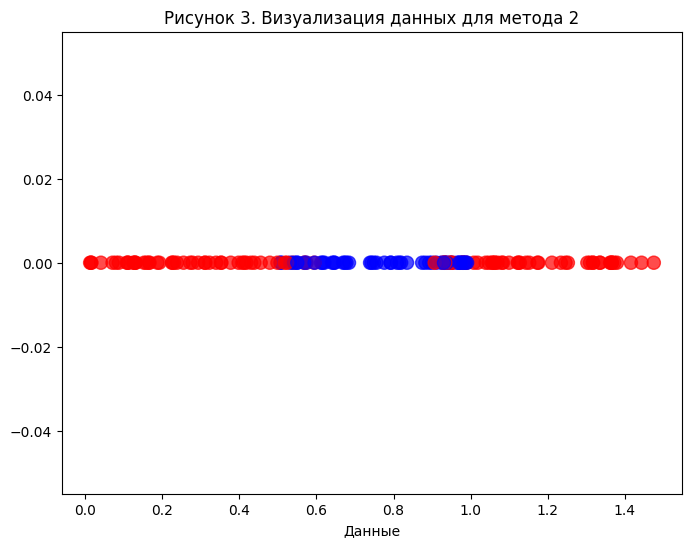

In [ ]:
# Генерация 3 групп данных
data_group1 = np.random.uniform(0, 0.6, 50)
labels_group1 = [False] * 50

data_group2 = np.random.uniform(0.5, 1, 50)
labels_group2 = [True] * 50

data_group3 = np.random.uniform(0.9, 1.5, 50)
labels_group3 = [False] * 50

# Соединение данных
data2 = np.concatenate([data_group1, data_group2, data_group3])
labels = np.concatenate([labels_group1, labels_group2, labels_group3])

shuffled_indices = np.arange(len(data2))
np.random.shuffle(shuffled_indices)

data2 = data2[shuffled_indices]
labels = labels[shuffled_indices]

colors = ['blue' if label else 'red' for label in labels]

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(data2, np.zeros_like(data2), c=colors, s=90, alpha=0.7)

plt.xlabel('Данные')
plt.title('Рисунок 3. Визуализация данных для метода 2')

plt.show()

##### Реализация методов вычисления матрицы для различных ядер  и её последующего спектрального разложения

In [ ]:
# Функция определения собственных чисел и векторов
def get_eig_vals_vecs(A: np.ndarray, max_iter=10):
  A_k = A
  Q_k = np.eye(A.shape[1])
  for k in range(max_iter):
    Q, R = qr_decomposition(A_k)
    Q_k = Q_k.dot(Q)
    A_k = R.dot(Q)
  eigenvalues = np.diag(A_k)
  eigenvectors = Q_k
  return eigenvalues, eigenvectors

Метод 1. Использование радиальной базисной функции

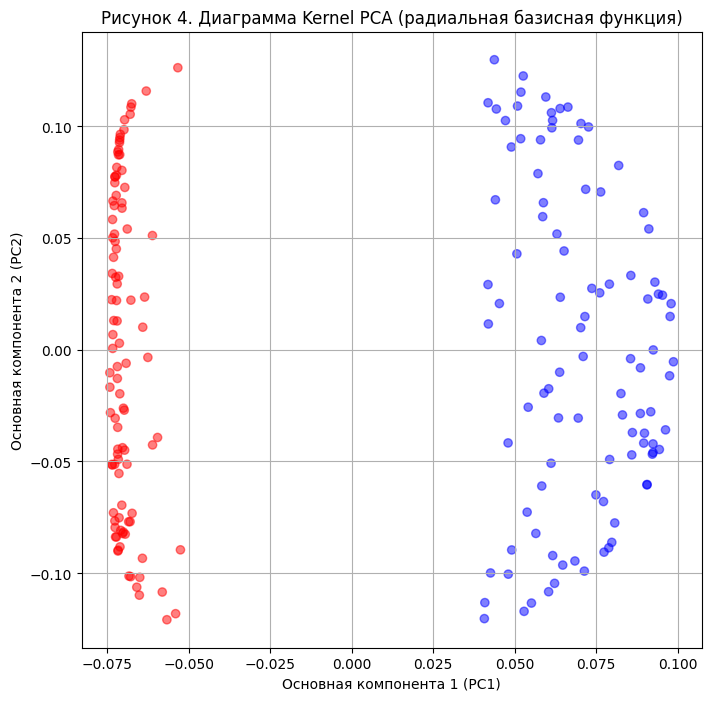

In [ ]:
# Определение функции ядра
def rbf_kernel(x1, x2, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(x1 - x2)**2)


# Вычисление матрицы ядра
def calculate_kernel_matrix(X, gamma=1.0):
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = rbf_kernel(X[i], X[j], gamma)
    return K

# Центрирование
def center_kernel_matrix(K):
    n_samples = K.shape[0]
    one_n = np.ones((n_samples, n_samples)) / n_samples
    centered_K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    return centered_K

X_train = data[['X', 'Y']].values
gamma = 0.5
K = calculate_kernel_matrix(X_train, gamma)
centered_K = center_kernel_matrix(K)

eigenvalues, eigenvectors = get_eig_vals_vecs(centered_K)
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]

eigenpairs.sort(key=lambda x: x[0], reverse=True)

# Верхние собственные числа
k = 2
top_eigenvalues, top_eigenvectors = zip(*eigenpairs[:k])

# Проецирование данных на собственные векторы
X_train_kernelPCA = np.column_stack(top_eigenvectors)

X_train_kernelPCA = pd.DataFrame(X_train_kernelPCA, columns=['PC1', 'PC2'])

# Окраска данных
colors = np.where(X_train_kernelPCA['PC1'] < 0, 'red', 'blue')

# Визуализация
plt.figure(figsize=(8, 8))
plt.scatter(X_train_kernelPCA['PC1'], X_train_kernelPCA['PC2'], c=colors, alpha=0.5)
plt.title('Рисунок 4. Диаграмма Kernel PCA (радиальная базисная функция)')
plt.xlabel('Основная компонента 1 (PC1)')
plt.ylabel('Основная компонента 2 (PC2)')
plt.grid(True)

plt.show()

Как видно из рисунка 4, после проецирования исходного массива данных на первые главные компоненты данные становятся линейно разделимыми. Два класса данных можно разделить, используя только первую компоненту.

Метод 2. Использование полиномиального ядра

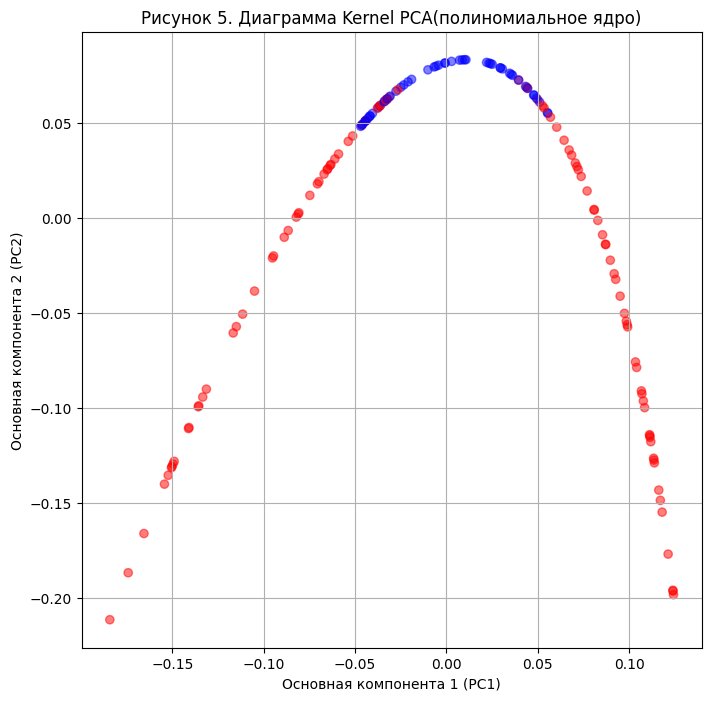

In [ ]:
def polynomial_kernel(x1, x2, degree=2, coef0=1.0):
    return (np.dot(x1, x2) + coef0) ** degree

# Вычисление матрицы ядра, используя Polynomial kernel
def calculate_kernel_matrix(X, degree=2, coef0=1.0):
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = polynomial_kernel(X[i], X[j], degree=degree, coef0=coef0)
    return K

X_train = data2

degree = 2  # Регулировка параметра degree
coef0 = 1  # Регулировка параметра coef0
K = calculate_kernel_matrix(X_train, degree=degree, coef0=coef0)
centered_K = center_kernel_matrix(K)

# Разложение по собственным числам, собственным векторам
eigenvalues, eigenvectors = get_eig_vals_vecs(centered_K)
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]

# Сортировка
eigenpairs.sort(key=lambda x: x[0], reverse=True)

# Выбор верхних k собственных векторов (в данном случае k = 2)
k = 2
top_eigenvalues, top_eigenvectors = zip(*eigenpairs[:k])

# Проецирование данных на верхние собственные вектора
X_train_kernelPCA = np.column_stack(top_eigenvectors)

# Создание фрейма данных
X_train_kernelPCA = pd.DataFrame(X_train_kernelPCA, columns=['PC1', 'PC2'])

# Цветные компоненты 'PC1'
colors = ['blue' if label else 'red' for label in labels]

# Построение диаграммы рассеяния компонент Kernel PCA
plt.figure(figsize=(8, 8))
plt.scatter(X_train_kernelPCA['PC1'], X_train_kernelPCA['PC2'], c=colors, alpha=0.5)
plt.title('Рисунок 5. Диаграмма Kernel PCA(полиномиальное ядро)')
plt.xlabel('Основная компонента 1 (PC1)')
plt.ylabel('Основная компонента 2 (PC2)')
plt.grid(True)

# Показать диаграмму
plt.show()

Из рисунка 5 видно, что данные также стали линейно разделимыми при использовании Kernel PCA на основе полиномиального ядра. Далее в качестве примера мы применили к этим данным метод опорных векторов (SVM), показывающий как решается задача классификации в этом случае (построение границы решения, см. рисунок 6)

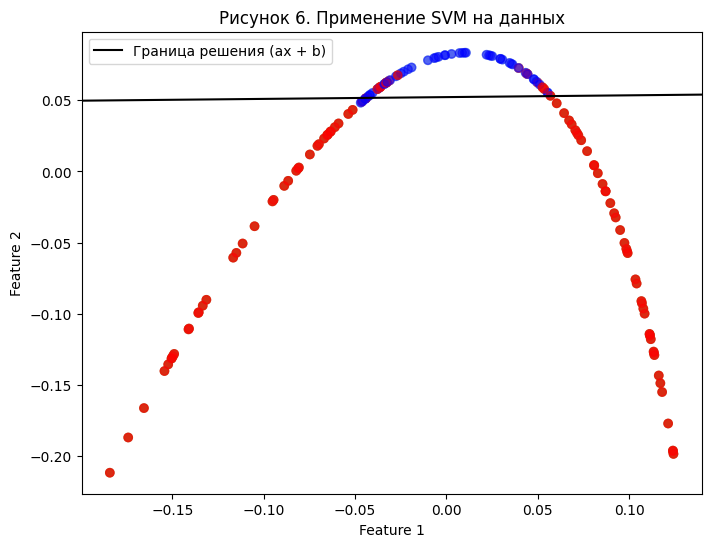

In [ ]:
X = X_train_kernelPCA.values
y = [0 if label else 1 for label in labels]

# Создание линейного SVM классификатора
svm_model = SVC(kernel='linear', C=100)

# Fit the SVM model to your data
svm_model.fit(X_train_kernelPCA, y)

# Визуализация
plt.figure(figsize=(8, 6))

# Построение исходного графика данных
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')
plt.scatter(X_train_kernelPCA['PC1'], X_train_kernelPCA['PC2'], c=colors, alpha=0.5)

# Извлечение коэффициентов
w = svm_model.coef_
b = svm_model.intercept_

# Построение границы решения по двум точкам
def decision_boundary(x):
    return -(w[0][0] / w[0][1]) * x - (b[0] / w[0][1])

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = decision_boundary(x_min), decision_boundary(x_max)

plt.axline(xy1=(x_min, y_min), xy2=(x_max, y_max), color='black', linestyle='-', label='Граница решения (ax + b)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Рисунок 6. Применение SVM на данных')
plt.legend()
plt.show()

##### Сравнительный анализ применения PCA и Kernel PCA

PCA предполагает, что данные линейно взаимосвязаны, что приводит к некорректности при работе с нелинейными данными. Решением этой проблемы является использование метода ядерного PCA (Kernel PCA).
Kernel PCA преобразует данные в нелинейное пространство, производя нелинейные отображения, которые позволяют найти скрытые нелинейные зависимости. Kernel PCA способен обнаруживать сложные нелинейные структуры (изгибы, петли и многомерные многообразия).

**Основное отличие между PCA и Kernel PCA заключается в способе преобразования данных**. В PCA преобразование происходит линейно: исходная матрица данных умножается на матрицу главных компонент. В Kernel PCA применяется ядерная функция, которая преобразует исходные признаки в более высокую размерность, а затем применяется классический PCA в этом расширенном пространстве.

В отличие от PCA, Kernel PCA может работать с нелинейными данными, однако у него есть свои недостатки:

1. Kernel PCA требует выбора подходящего ядра. Неправильный выбор ядра может привести к потере важной информации или чрезмерной сложности вычислений.

2. Kernel PCA может быть вычислительно затратным при работе с большими наборами данных.


---


Выбор между PCA и Kernel PCA зависит от особенностей данных и конкретной задачи.
Если данные линейны, PCA может быть предпочтительным выбором из-за своей простоты и вычислительной эффективности.
Если данные нелинейны, то Kernel PCA может быть предпочтительным вариантом, но при выборе ядра необходимо аккуратно подбирать параметры для достижения наилучшего результата.
